In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import mne
%matplotlib qt

In [2]:
raw = mne.io.read_raw_fif('pre_filtered_data_raw.fif', preload=True)

Opening raw data file pre_filtered_data_raw.fif...
    Range : 25000 ... 1583999 =     50.000 ...  3167.998 secs
Ready.
Opening raw data file C:\Users\chrim\cs_cog_fat\pre_filtered_data_raw-1.fif...
    Range : 1584000 ... 2135999 =   3168.000 ...  4271.998 secs
Ready.
Reading 0 ... 2110999  =      0.000 ...  4221.998 secs...


Using matplotlib as 2D backend.


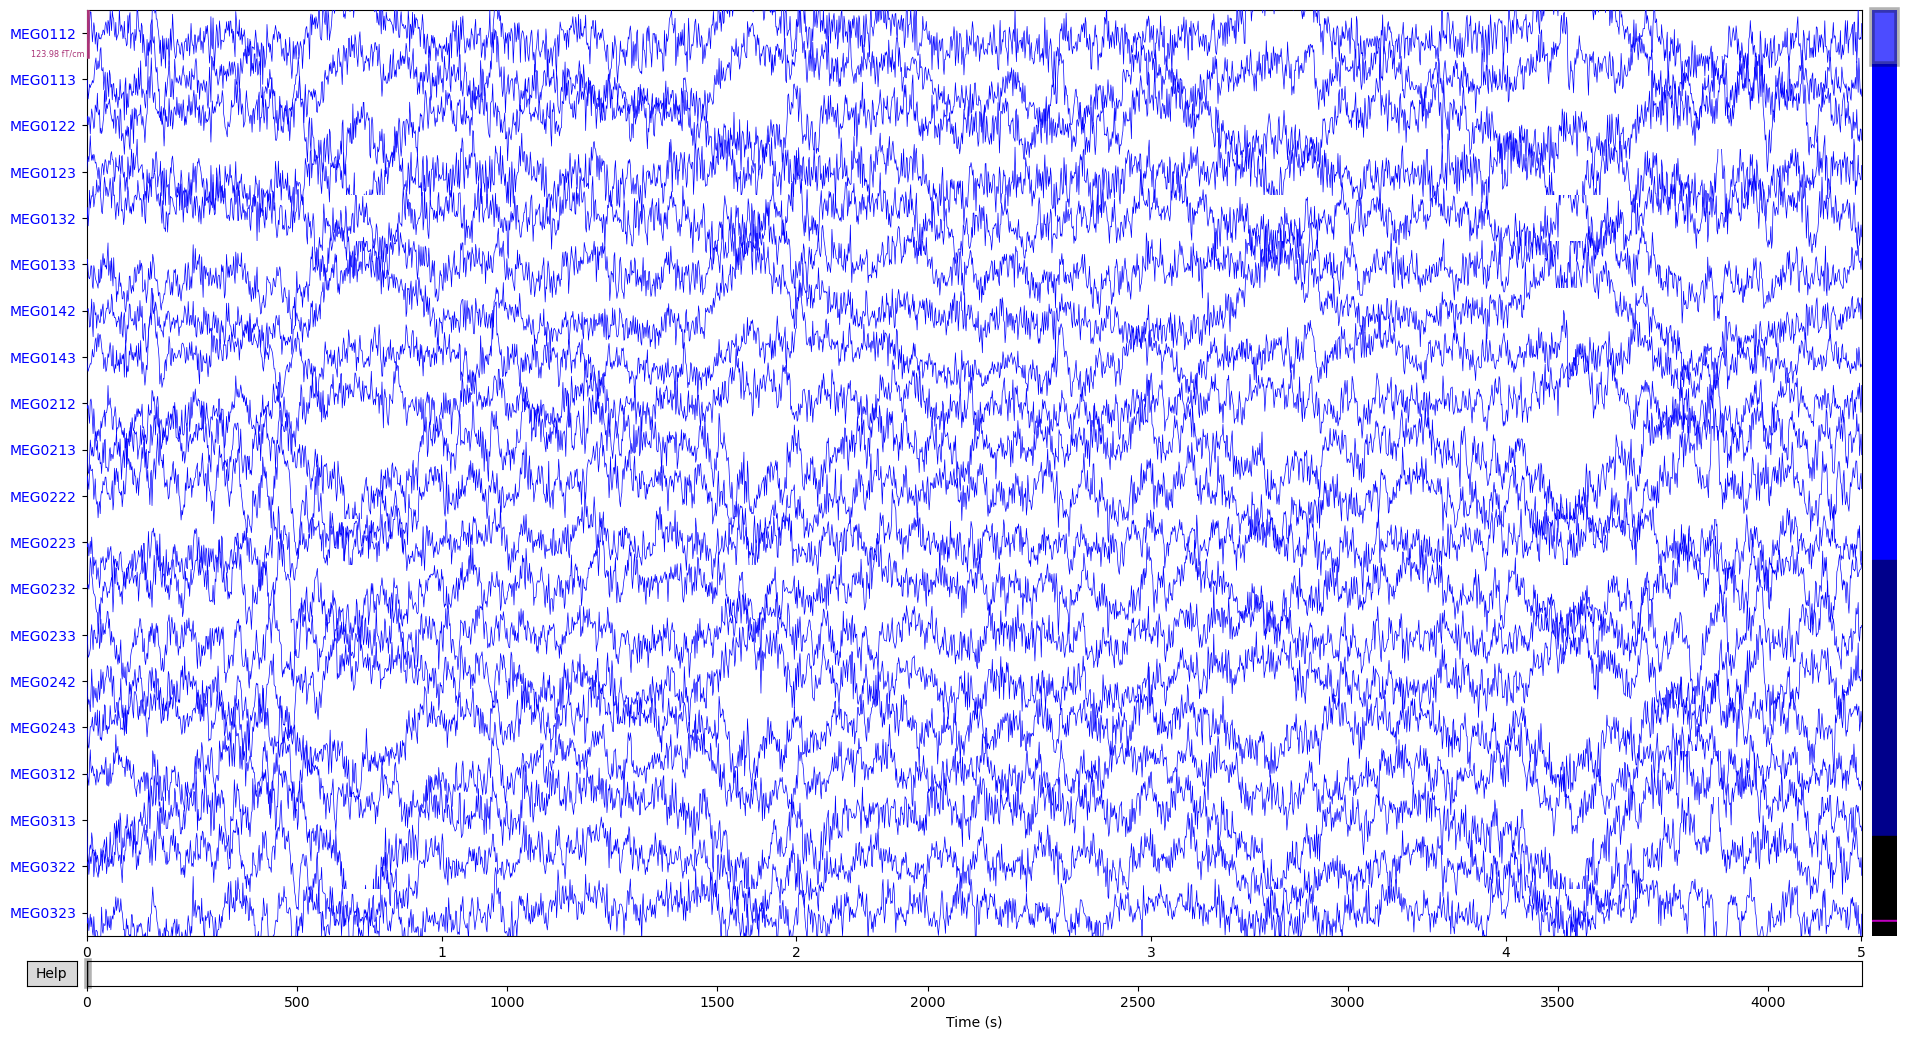

Channels marked as bad:
none


In [4]:
raw.plot(duration=5, n_channels=20, scalings='auto')

# power line

Effective window size : 4.096 (s)


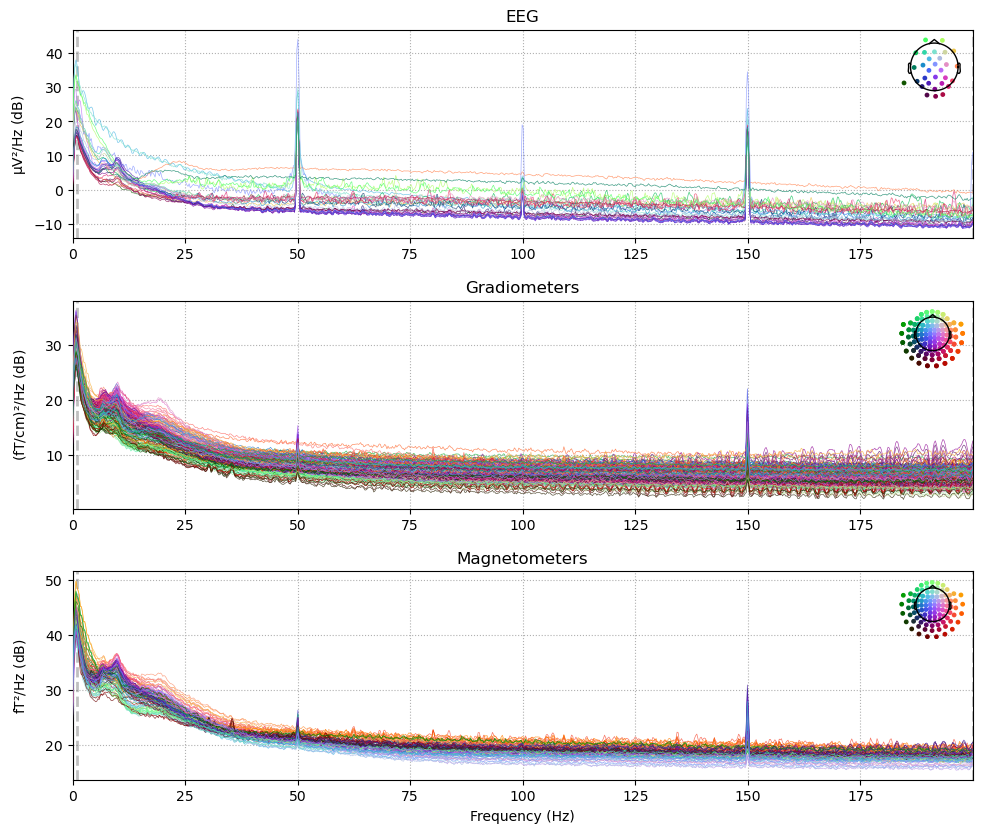

In [3]:
raw.compute_psd(fmax=200).plot(picks="data", exclude="bads")

# ECG artifacts

In [5]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
ecg_epochs.plot_image(combine="mean")

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 4870 (average pulse 69 / min.)
Not setting metadata
4870 matching events found
No baseline correction applied
Using data from preloaded Raw for 4870 events and 501 original time points ...
1 bad epochs dropped
Not setting metadata
4869 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4869 matching events found
No baseline correction applied
0 projection items activated
Not setting me

[<Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>]

In [7]:
avg_ecg_epochs = ecg_epochs.average().apply_baseline((-0.5, -0.2))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)


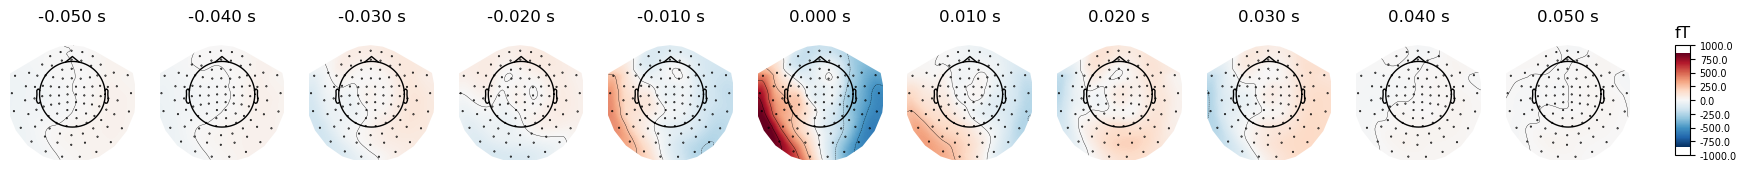

In [8]:
avg_ecg_epochs.plot_topomap(times=np.linspace(-0.05, 0.05, 11))

In [9]:
avg_ecg_epochs.plot_joint(times=[-0.25, -0.025, 0, 0.025, 0.25])

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[<Figure size 800x420 with 9 Axes>,
 <Figure size 800x420 with 9 Axes>,
 <Figure size 800x420 with 9 Axes>]

# EOG

In [10]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
eog_epochs.plot_image(combine="mean")
eog_epochs.average().plot_joint()

Using EOG channel: EOG002
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Now detecting blinks and generating corresponding events


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 197 significant peaks
Number of EOG events detected: 197
Not setting metadata
197 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 197 events and 501 original time points ...
0 bad epochs dropped
Not setting metadata
197 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
197 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
197 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pic

[<Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>]